# Actividad 3 — Estadística descriptiva con el dataset de Wine

- Calcular medidas de tendencia central y dispersión.
- Comparar **media vs. mediana** para detectar sesgo.
- Identificar correlaciones entre variables químicas del vino.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.0)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: f"{x:,.3f}")

## 1. Carga del dataset
Usamos el dataset **Wine** incluido en `sklearn`. Contiene 178 vinos con 13 variables químicas y la clase (`target`) de origen.

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


## Mean (Average)


In [24]:
means = wine_data.mean()
print(means)

fixed acidity           8.320
volatile acidity        0.528
citric acid             0.271
residual sugar          2.539
chlorides               0.087
free sulfur dioxide    15.875
total sulfur dioxide   46.468
density                 0.997
pH                      3.311
sulphates               0.658
alcohol                10.423
quality                 5.636
dtype: float64


In [25]:
alcohol_mean = wine_data['alcohol'].mean()
print(f"Mean alcohol content: {alcohol_mean:.2f}")

Mean alcohol content: 10.42


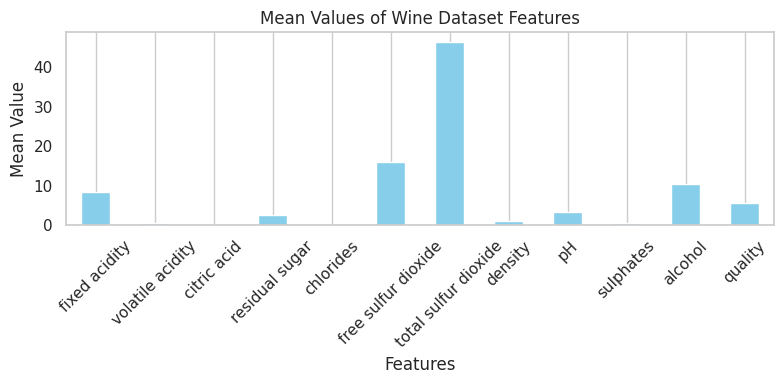

In [26]:
plt.figure(figsize=(8,4))
means.plot(kind='bar', color='skyblue')
plt.title('Mean Values of Wine Dataset Features')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Los vinos presentan en promedio altos niveles de dióxido de azufre total y libre, junto con alcohol y acidez fija. Variables como pH, azúcar residual y sulphates son bajas, mientras que la calidad se concentra en valores medios alrededor de 5–6.

## Median

In [27]:
medians = wine_data.median()
print(medians)

fixed acidity           7.900
volatile acidity        0.520
citric acid             0.260
residual sugar          2.200
chlorides               0.079
free sulfur dioxide    14.000
total sulfur dioxide   38.000
density                 0.997
pH                      3.310
sulphates               0.620
alcohol                10.200
quality                 6.000
dtype: float64


In [28]:
alcohol_median = wine_data['alcohol'].median()
print(f"Median alchocol content: {alcohol_median:.2f}")

Median alchocol content: 10.20


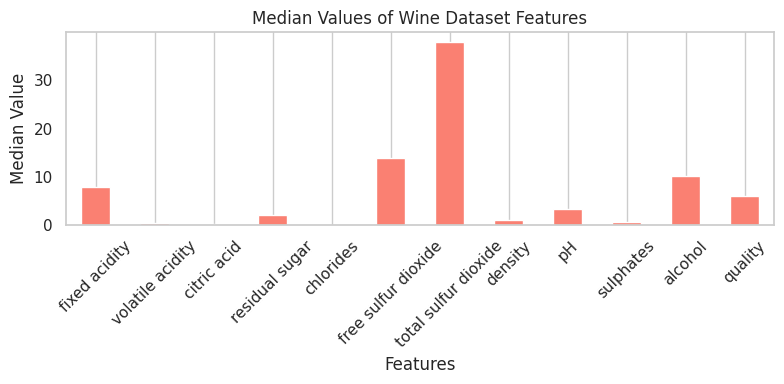

In [29]:
plt.figure(figsize=(8, 4))
medians.plot(kind='bar', color='salmon')
plt.title('Median Values of Wine Dataset Features')
plt.ylabel('Median Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

El **dióxido de azufre total** presenta la mediana más alta, seguido de **dióxido de azufre libre**, **alcohol** y **acidez fija**. Variables como **sulphates**, **density** y **residual sugar** tienen valores muy bajos.

## Mode

In [30]:
modes = wine_data.mode()
print(modes)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.200             0.600        0.000           2.000      0.080   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                6.000                28.000    0.997 3.300      0.600   

   alcohol  quality  
0    9.500        5  


In [31]:
alcohol_mode = wine_data["alcohol"].mode()
print(f"Mode alcohol content: {alcohol_mode[0]:.2f}")

Mode alcohol content: 9.50


<Figure size 800x400 with 0 Axes>

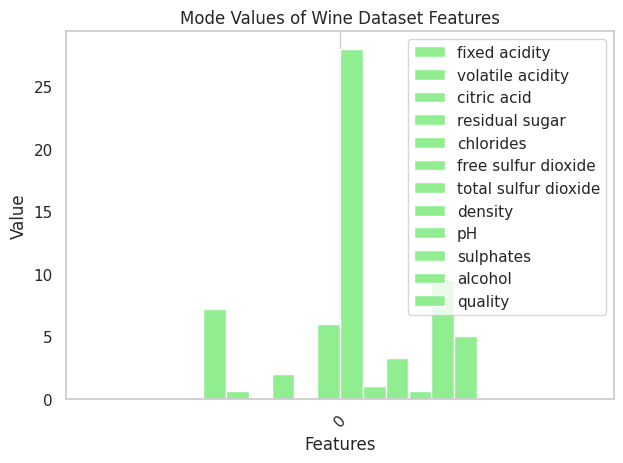

In [32]:
plt.figure(figsize=(8,4))
modes.plot(kind='bar', color='lightgreen')
plt.title('Mode Values of Wine Dataset Features')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

El **dióxido de azufre total** muestra la moda más alta entre las variables, indicando que muchos vinos comparten un mismo nivel en esta característica. También destacan **alcohol**, **acidez fija** y **free sulfur dioxide**, mientras que variables como **density** y **citric acid** tienen modas muy bajas.


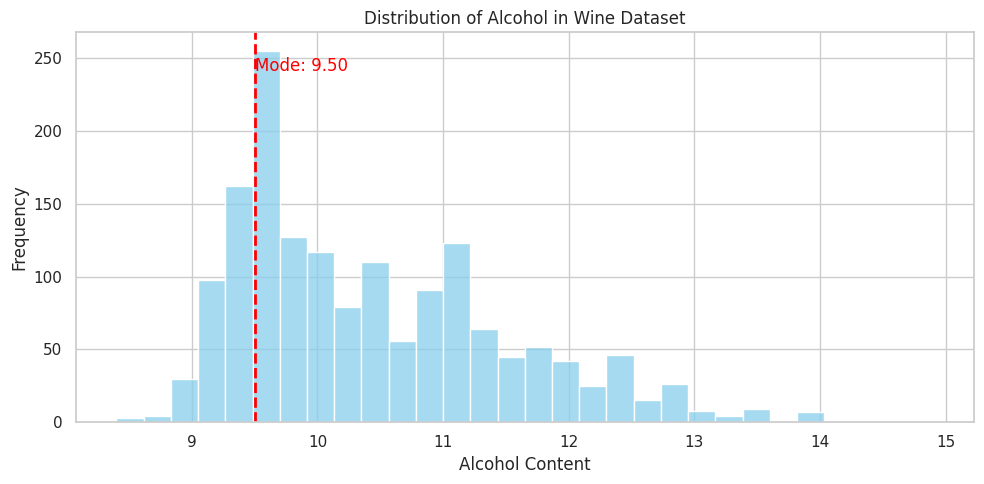

In [33]:
sns.set(style="whitegrid")

# Selecting the 'alcohol' feature for demonstration
feature = 'alcohol'

plt.figure(figsize=(10, 5))

# Plotting histogram
sns.histplot(wine_data[feature], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of {feature.capitalize()} in Wine Dataset')
plt.xlabel(f'{feature.capitalize()} Content')
plt.ylabel('Frequency')

# Highlight the mode
mode_val = wine_data[feature].mode().iloc[0]
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(mode_val, max_ylim*0.9, f'Mode: {mode_val:.2f}', horizontalalignment='left', color='red')

plt.tight_layout()
plt.show()

La distribución del alcohol en los vinos se concentra principalmente entre 9% y 11%, con la **moda en 9.5%**, reflejando que este es el valor más frecuente. La frecuencia disminuye progresivamente a medida que el contenido alcohólico aumenta hacia valores superiores a 12%.


## Medidas de dispersión
### Rango

Range of 'alcohol' content in wines: 6.50


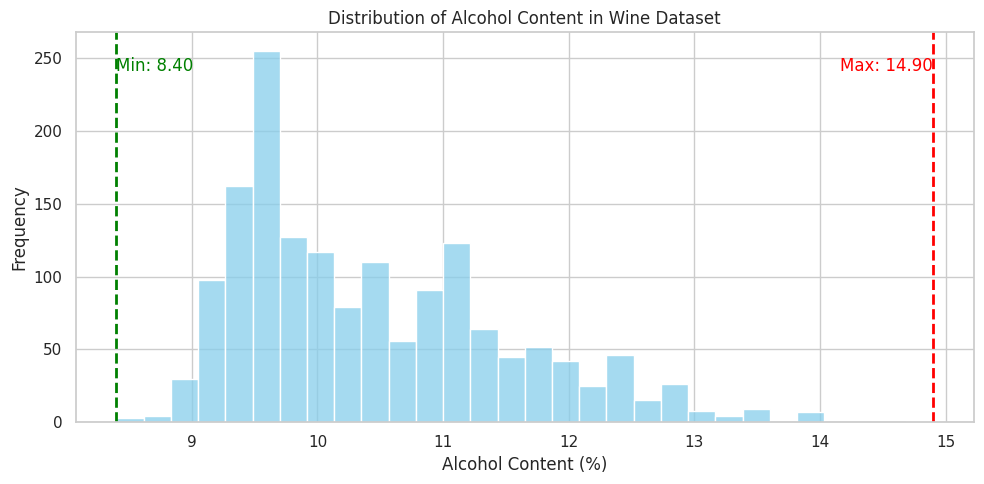

In [34]:
# Calculate range for the 'alcohol' feature
range = wine_data['alcohol'].max() - wine_data['alcohol'].min()
print(f"Range of 'alcohol' content in wines: {range:.2f}")

# Plotting histogram with the range highlighted
plt.figure(figsize=(10, 5))

sns.histplot(wine_data['alcohol'], bins=30, kde=False, color="skyblue")

plt.title(f'Distribution of Alcohol Content in Wine Dataset')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')

# Highlight the min and max values to depict range
min_val = wine_data['alcohol'].min()
max_val = wine_data['alcohol'].max()
plt.axvline(min_val, color='green', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(min_val, max_ylim*0.9, f'Min: {min_val:.2f}', horizontalalignment='left', color='green')
plt.text(max_val, max_ylim*0.9, f'Max: {max_val:.2f}', horizontalalignment='right', color='red')

plt.tight_layout()
plt.show()

El contenido de alcohol varía entre **8.4% y 14.9%**, con un rango total de **6.5 puntos porcentuales**. La mayor concentración de vinos se encuentra entre 9% y 11%, mientras que los valores extremos son poco frecuentes.


## Varianza

Variance of 'alcohol' content in wines: 1.1349


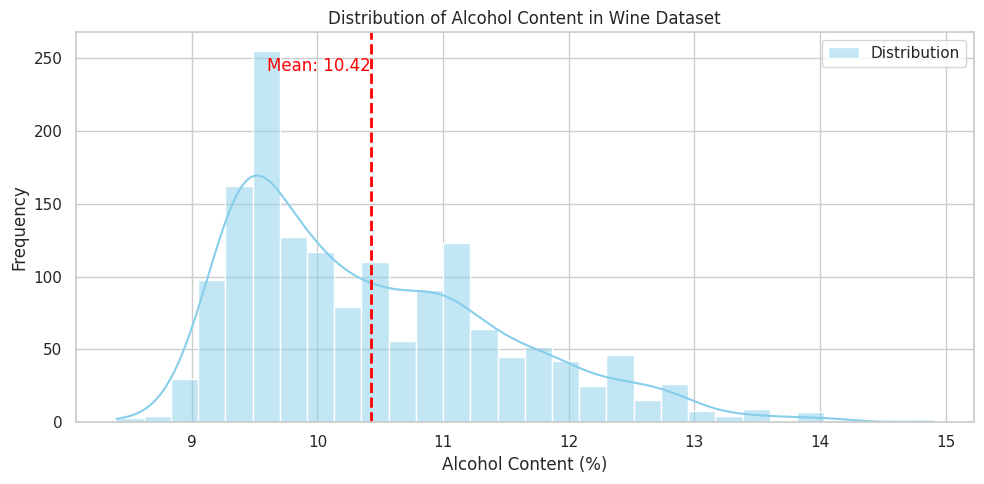

In [35]:
# Calculate variance for the 'alcohol' feature
alcohol_variance = np.var(wine_data['alcohol'])  # using ddof=1 for unbiased estimator

print(f"Variance of 'alcohol' content in wines: {alcohol_variance:.4f}")

# Plotting histogram with the mean highlighted
plt.figure(figsize=(10, 5))

sns.histplot(wine_data['alcohol'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = wine_data['alcohol'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')

plt.title(f'Distribution of Alcohol Content in Wine Dataset')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

La media del contenido de alcohol es **10.42%**, cercana al rango central de la distribución. La mayoría de los vinos se concentran entre 9% y 11%, aunque existe una cola hacia valores más altos, lo que indica una ligera asimetría positiva.


## Desviación estándar

Standard Deviation of 'alcohol' content in wines: 1.0657


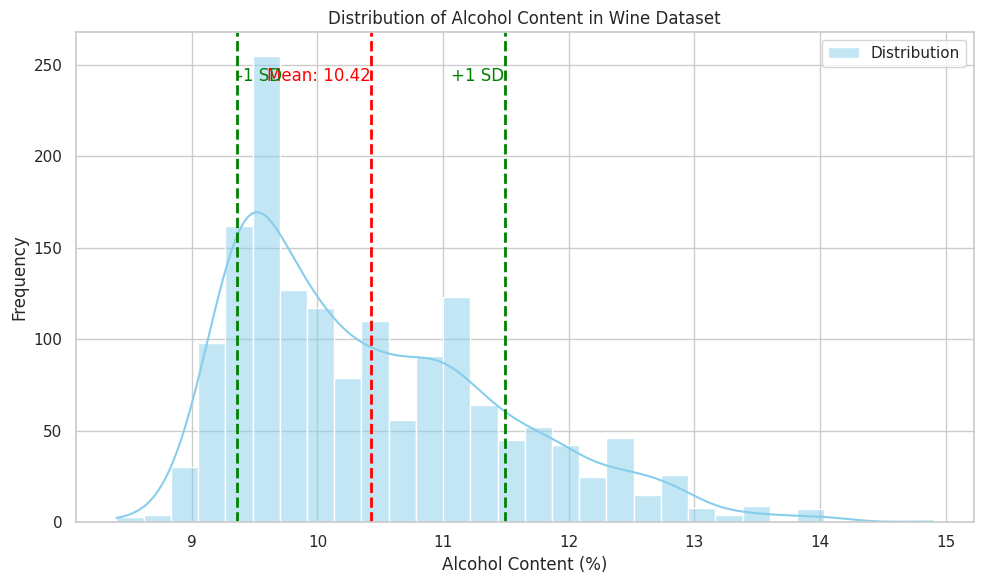

In [36]:
# Calculate standard deviation for the 'alcohol' feature
alcohol_std_dev = np.std(wine_data['alcohol'], ddof=1)  # using ddof=1 for unbiased estimator

print(f"Standard Deviation of 'alcohol' content in wines: {alcohol_std_dev:.4f}")

# Plotting histogram with the mean and standard deviations highlighted
plt.figure(figsize=(10, 6))

sns.histplot(wine_data['alcohol'], bins=30, kde=True, color="skyblue", label="Distribution")

# Highlight the mean value
mean_val = wine_data['alcohol'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_val + alcohol_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_val - alcohol_std_dev, color='green', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='red')
plt.text(mean_val + alcohol_std_dev, max_ylim*0.9, f'+1 SD', horizontalalignment='right', color='green')
plt.text(mean_val - alcohol_std_dev, max_ylim*0.9, f'-1 SD', horizontalalignment='left', color='green')

plt.title(f'Distribution of Alcohol Content in Wine Dataset')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

El contenido de alcohol en los vinos presenta una **media de 10.42%** y una **desviación estándar de 1.07%**, lo que indica baja dispersión. La mayoría de los vinos se concentran dentro del rango 9.35%–11.49%, mostrando consistencia en la producción.


## Quartiles and Interquartile Range (IQR)


Q1 (25th Percentile): 9.5000
Q2 (Median / 50th Percentile): 10.2000
Q3 (75th Percentile): 11.1000
IQR (Interquartile Range): 1.6000


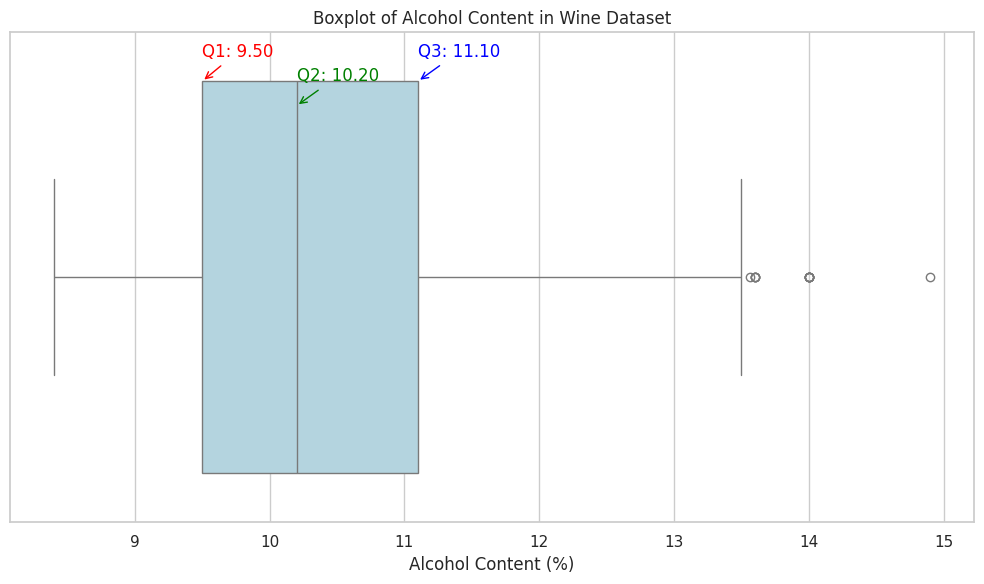

In [37]:
# Compute quartiles and IQR (using percentile function)
Q1 = np.percentile(wine_data['alcohol'], 25)
Q2 = np.percentile(wine_data['alcohol'], 50)
Q3 = np.percentile(wine_data['alcohol'], 75)
IQR = Q3 - Q1

print(f"Q1 (25th Percentile): {Q1:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2:.4f}")
print(f"Q3 (75th Percentile): {Q3:.4f}")
print(f"IQR (Interquartile Range): {IQR:.4f}")

# Visualization using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=wine_data['alcohol'], color="lightblue")
plt.title("Boxplot of Alcohol Content in Wine Dataset")
plt.xlabel('Alcohol Content (%)')

# Displaying the quartile values on the plot
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, -0.4), xytext=(Q1, -0.45), arrowprops=dict(arrowstyle='->', color='red'), color='red')
plt.annotate(f'Q2: {Q2:.2f}', xy=(Q2, -0.35), xytext=(Q2, -0.4), arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Q3: {Q3:.2f}', xy=(Q3, -0.4), xytext=(Q3, -0.45), arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

plt.tight_layout()
plt.show()

El contenido de alcohol tiene un **Q1 de 9.50%, mediana de 10.20% y Q3 de 11.10%**, con un **IQR de 1.60%**. La mayoría de los vinos se concentran en este rango central, aunque se observan algunos **outliers** hacia valores altos (13%–15%).


In [14]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

df = wine.frame.copy()
features = wine.feature_names
target_name = "target"

print(f"Shape: {df.shape}")
df.head()

Shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,"1,065.000",0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000",0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,"1,185.000",0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,"1,480.000",0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


## Exploración
- Tipos de datos
- Nulos y duplicados


In [15]:
display(df.info())
print("\nNulos por columna:")
display(df.isna().sum())
print("\nDuplicados (filas repetidas):", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None


Nulos por columna:


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0



Duplicados (filas repetidas): 0


## Estadísticas descriptivas

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

desc = df[num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T
desc["skew"] = df[num_cols].skew()
desc["kurtosis"] = df[num_cols].kurtosis()
desc = desc[["mean","50%","std","min","25%","75%","90%","95%","99%","max","skew","kurtosis"]].sort_index()

display(desc)

,mean,50%,std,min,25%,75%,90%,95%,99%,max,skew,kurtosis
alcalinity_of_ash,19.495,19.500,3.340,10.600,17.200,21.500,24.000,25.000,28.500,30.000,0.213,0.488
alcohol,13.001,13.050,0.812,11.030,12.362,13.678,14.100,14.222,14.473,14.830,-0.051,-0.852
ash,2.367,2.360,0.274,1.360,2.210,2.558,2.700,2.742,2.989,3.230,-0.177,1.144
color_intensity,5.058,4.690,2.318,1.280,3.220,6.200,8.530,9.598,11.018,13.000,0.869,0.382
flavanoids,2.029,2.135,0.999,0.340,1.205,2.875,3.233,3.498,3.791,5.080,0.025,-0.880
hue,0.957,0.965,0.229,0.480,0.782,1.120,1.233,1.285,1.427,1.710,0.021,-0.344
magnesium,99.742,98.000,14.282,70.000,88.000,107.000,118.000,124.300,141.760,162.000,1.098,2.105
malic_acid,2.336,1.865,1.117,0.740,1.603,3.083,3.983,4.456,5.542,5.800,1.040,0.299
nonflavanoid_phenols,0.362,0.340,0.124,0.130,0.270,0.438,0.530,0.600,0.630,0.660,0.450,-0.637
od280/od315_of_diluted_wines,2.612,2.780,0.710,1.270,1.938,3.170,3.456,3.580,3.843,4.000,-0.307,-1.086


## Comparación **media vs. mediana**
Si la **media** es mayor que la **mediana** es posible **sesgo a la derecha** (colas altas).
Si la **mediana** es mayor a la **media** el **sesgo es a la izquierda**.


In [17]:
comp = pd.DataFrame({
    "mean": df[num_cols].mean(),
    "median": df[num_cols].median()
})
comp["mean-median"] = comp["mean"] - comp["median"]
comp["rel_diff_%"] = (comp["mean-median"] / comp["median"]).replace([np.inf, -np.inf], np.nan) * 100
display(comp.sort_values("rel_diff_%", ascending=False).round(3))

,mean,median,mean-median,rel_diff_%
malic_acid,2.336,1.865,0.471,25.273
proline,746.893,673.500,73.393,10.897
color_intensity,5.058,4.690,0.368,7.848
nonflavanoid_phenols,0.362,0.340,0.022,6.428
proanthocyanins,1.591,1.555,0.036,2.309
magnesium,99.742,98.000,1.742,1.777
ash,2.367,2.360,0.007,0.276
alcalinity_of_ash,19.495,19.500,-0.005,-0.026
alcohol,13.001,13.050,-0.049,-0.378
hue,0.957,0.965,-0.008,-0.782


## Distribuciones

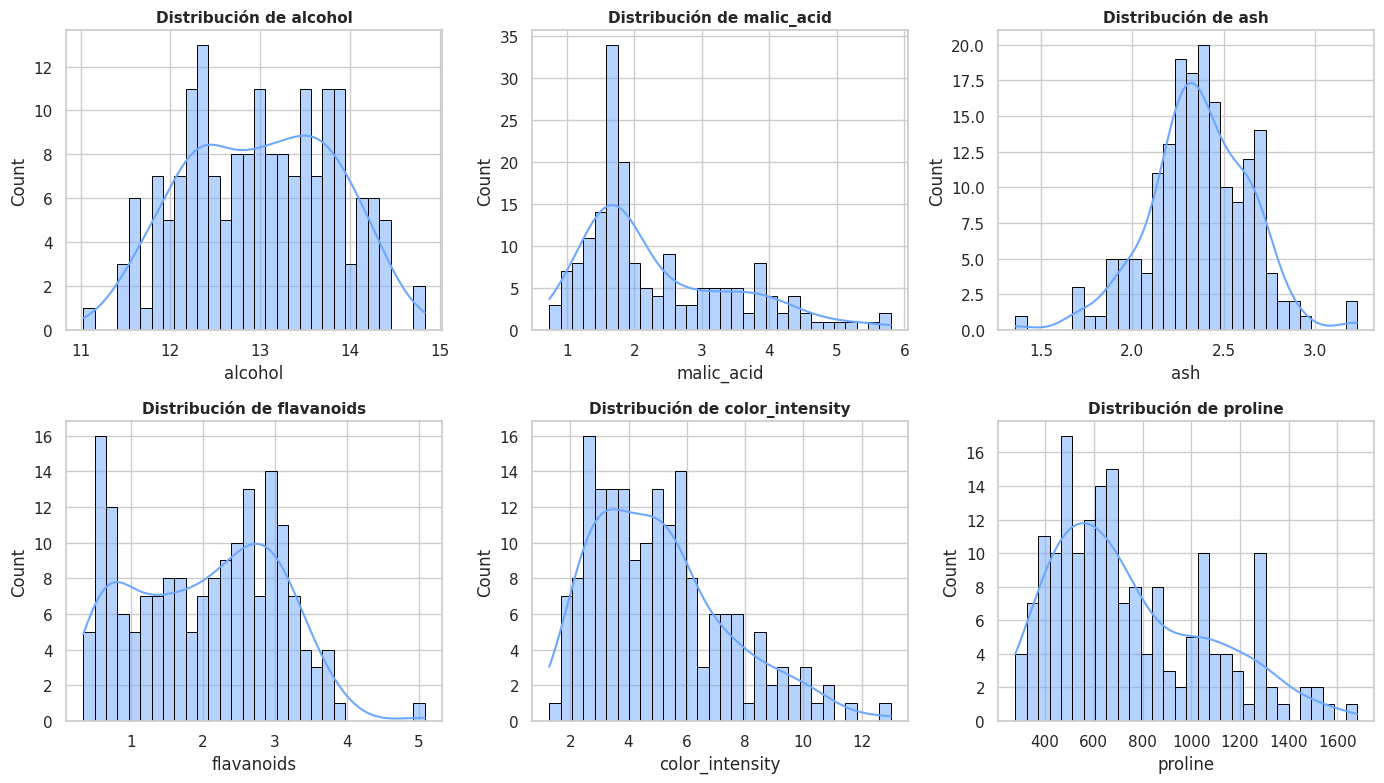

In [18]:
vars_to_plot = ["alcohol", "malic_acid", "ash", "flavanoids", "color_intensity", "proline"]
n = len(vars_to_plot)

fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.ravel()

for i, col in enumerate(vars_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="#6EA8FE", edgecolor="black")
    axes[i].set_title(f"Distribución de {col}", fontsize=11, weight="bold")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

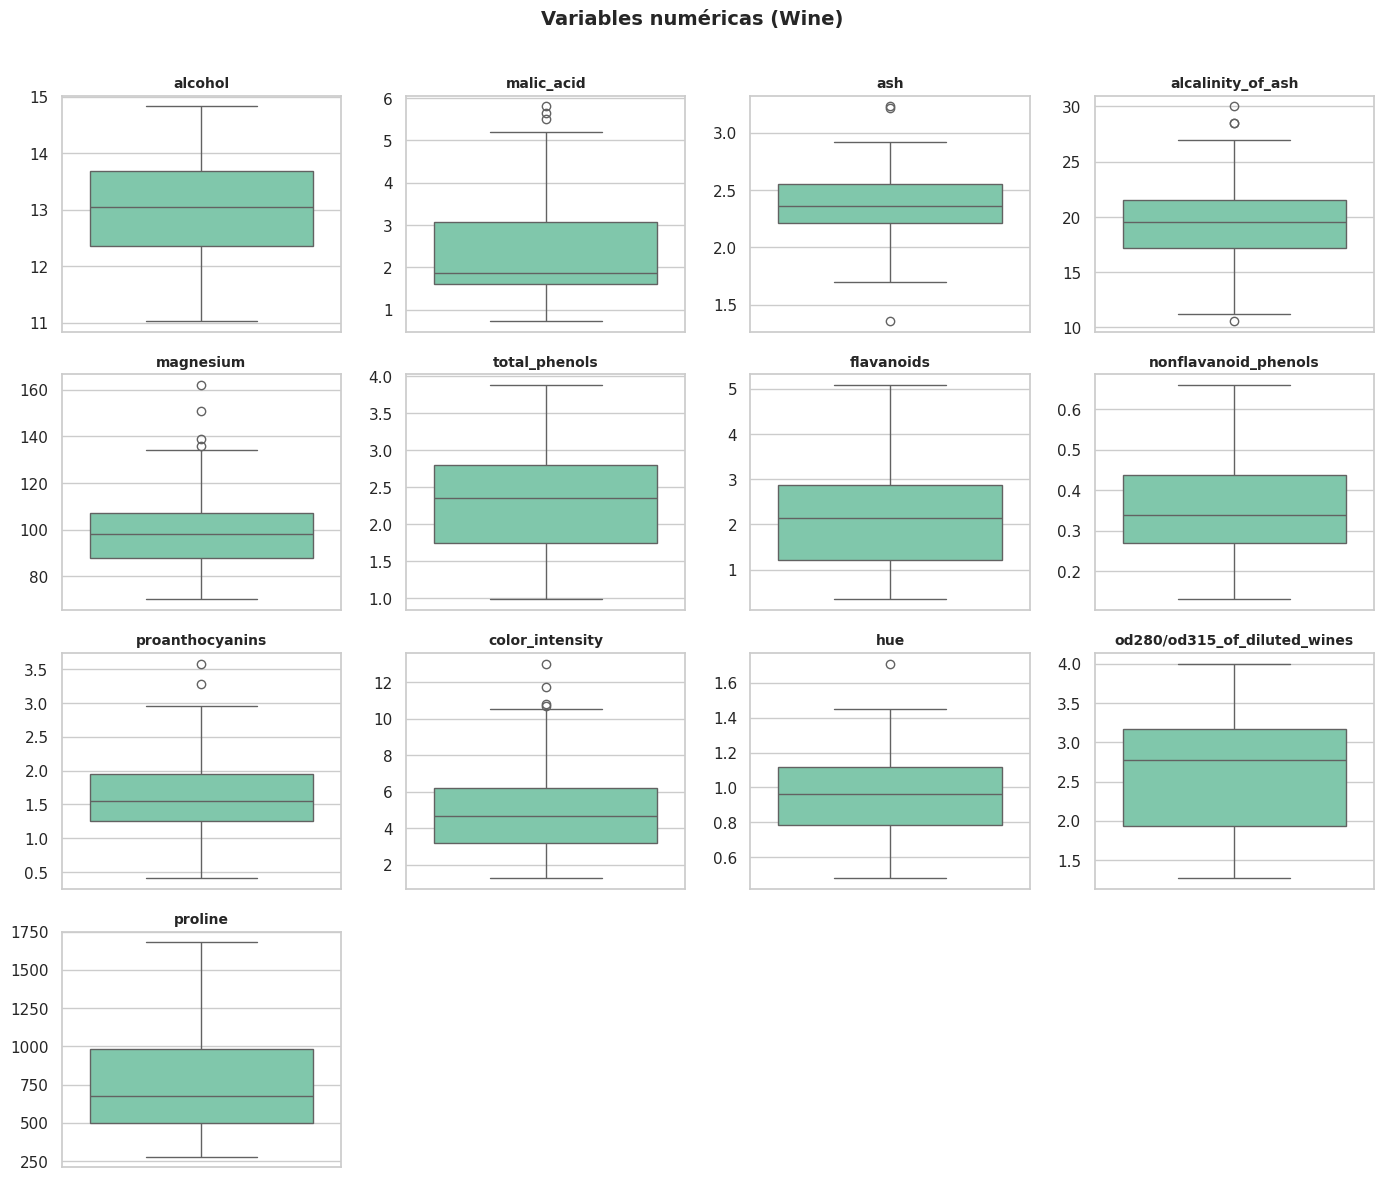

In [19]:
data_num = df.drop(columns=[target_name])
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(14,12))
axes = axes.ravel()

for i, col in enumerate(data_num.columns):
    sns.boxplot(y=df[col], ax=axes[i], color="#74D3AE")
    axes[i].set_title(col, fontsize=10, weight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, rows*cols):
    axes[j].axis("off")

plt.suptitle("Variables numéricas (Wine)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

## Correlaciones


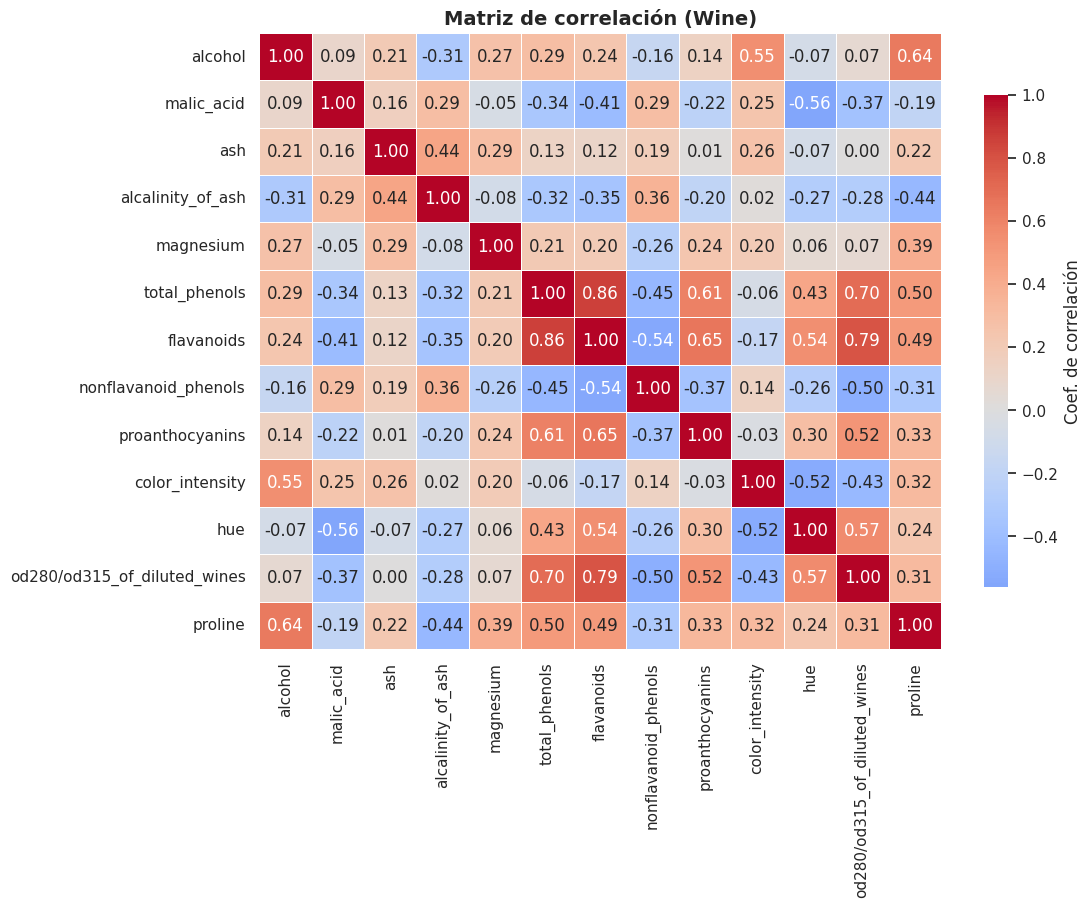


Top 10 correlaciones absolutas:


,,0
total_phenols,flavanoids,0.865
flavanoids,total_phenols,0.865
od280/od315_of_diluted_wines,flavanoids,0.787
flavanoids,od280/od315_of_diluted_wines,0.787
total_phenols,od280/od315_of_diluted_wines,0.700


In [20]:
corr = df[features].corr()

plt.figure(figsize=(11,8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": 0.8, "label": "Coef. de correlación"}
)
plt.title("Matriz de correlación (Wine)", fontsize=14, weight="bold")
plt.show()

corr_pairs = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))
        .abs()
        .unstack()
        .dropna()
        .sort_values(ascending=False)
)
print("\nTop 10 correlaciones absolutas:")
display(corr_pairs.head())

## Comparación de variables por clase de vino (`target`)

Para identificar diferencias entre los **3 tipos de vino** (clases 0, 1 y 2), generamos boxplots y/o violinplots de las variables más representativas (`alcohol` y `proline`).  

/tmp/ipython-input-3718600392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y="alcohol", palette="Set2")


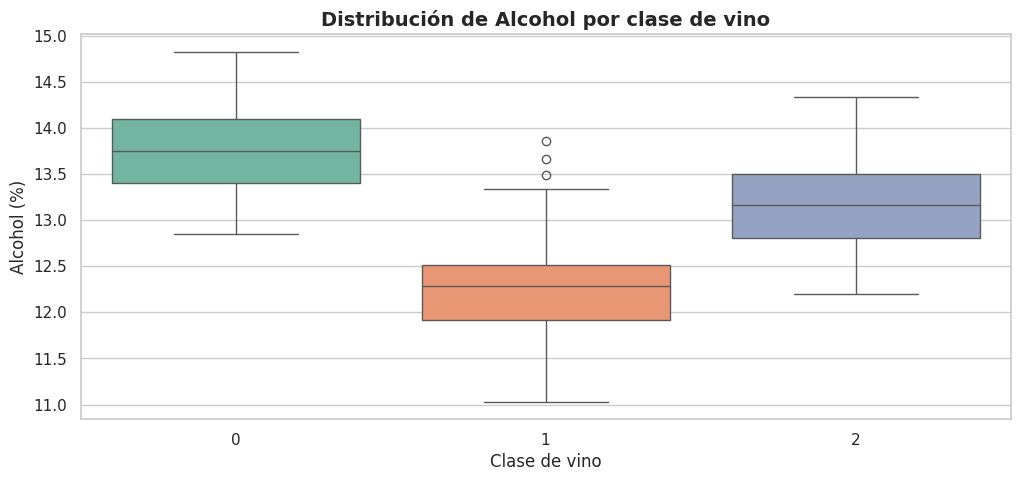

/tmp/ipython-input-3718600392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y="proline", palette="pastel")


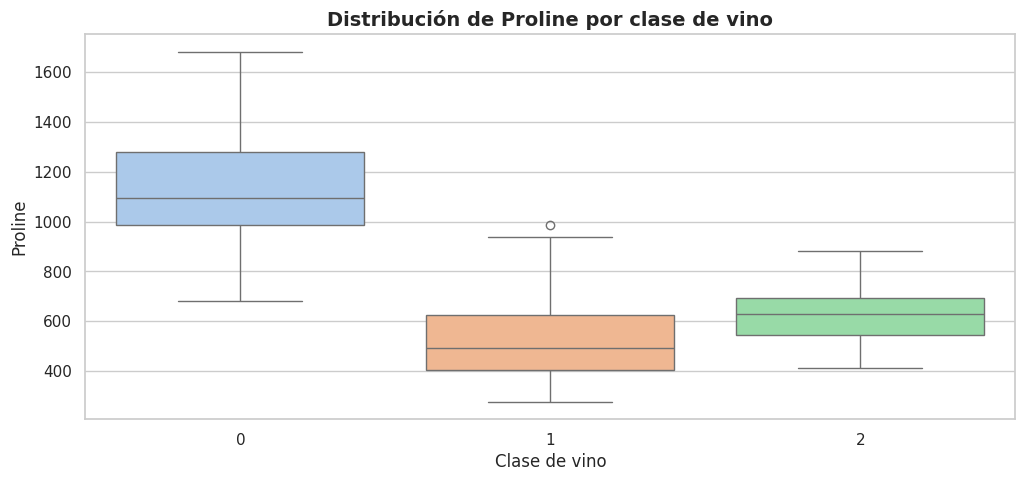

/tmp/ipython-input-3718600392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="target", y="color_intensity", palette="muted")


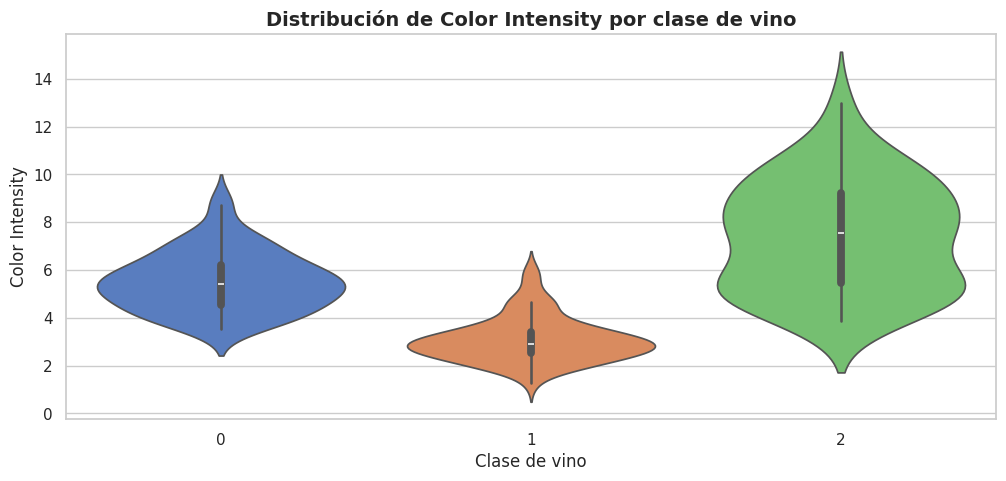

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="target", y="alcohol", palette="Set2")
plt.title("Distribución de Alcohol por clase de vino", fontsize=14, weight="bold")
plt.xlabel("Clase de vino")
plt.ylabel("Alcohol (%)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="target", y="proline", palette="pastel")
plt.title("Distribución de Proline por clase de vino", fontsize=14, weight="bold")
plt.xlabel("Clase de vino")
plt.ylabel("Proline")
plt.show()

plt.figure(figsize=(12,5))
sns.violinplot(data=df, x="target", y="color_intensity", palette="muted")
plt.title("Distribución de Color Intensity por clase de vino", fontsize=14, weight="bold")
plt.xlabel("Clase de vino")
plt.ylabel("Color Intensity")
plt.show()


- **Distribución de Alcohol por clase de vino**  
  Se observa que la clase **0** tiende a tener valores de alcohol más altos y consistentes (cerca de 13.5%), mientras que la clase **1** concentra vinos con menor contenido de alcohol (~12.5%). La clase **2** se encuentra en un rango intermedio-alto. Esto sugiere que el nivel de alcohol es un factor diferenciador entre las clases.

- **Distribución de Proline por clase de vino**  
  La variable *Proline* muestra claras diferencias: la clase **0** tiene concentraciones mucho más altas de Proline, mientras que la clase **1** muestra valores considerablemente más bajos. La clase **2** se ubica en un nivel medio. Este patrón indica que *Proline* es una de las características más discriminativas entre las clases de vino.

- **Distribución de Color Intensity por clase de vino**  
  La variable *Color Intensity* también varía notablemente. La clase **2** presenta los vinos con mayor intensidad de color, seguidos por la clase **0**, mientras que la clase **1** tiene los valores más bajos. Esto refleja que la intensidad de color está asociada fuertemente con el tipo de vino.

Las variables **Alcohol, Proline y Color Intensity** son fuertes indicadores para diferenciar las clases de vino, mostrando patrones claros que separan a cada grupo.


## Resumen

In [21]:
skew_abs = desc["skew"].abs().sort_values(ascending=False)
sesgadas = skew_abs.head(5).index.tolist()

top_corr = corr_pairs.head(5)

print("Variables con mayor asimetría (skew):")
for v in sesgadas:
    print(f" - {v}: skew={desc.loc[v,'skew']:.3f}")

print("\nTop correlaciones absolutas:")
for (a,b), val in top_corr.items():
    print(f" - {a} ~ {b}: {val:.3f}")


Variables con mayor asimetría (skew):
 - magnesium: skew=1.098
 - malic_acid: skew=1.040
 - color_intensity: skew=0.869
 - proline: skew=0.768
 - proanthocyanins: skew=0.517

Top correlaciones absolutas:
 - total_phenols ~ flavanoids: 0.865
 - flavanoids ~ total_phenols: 0.865
 - od280/od315_of_diluted_wines ~ flavanoids: 0.787
 - flavanoids ~ od280/od315_of_diluted_wines: 0.787
 - total_phenols ~ od280/od315_of_diluted_wines: 0.700


## Conclusiones

- El dataset de **Wine** está completo (178 registros, 13 variables químicas y la clase), sin valores nulos ni duplicados, lo que facilita su uso directo en análisis posteriores.  
- En la comparación **media vs. mediana**, variables como `malic_acid`, `proline` y `color_intensity` muestran diferencias importantes, indicando **sesgo positivo** (colas hacia la derecha).  
- El análisis de **asimetría y curtosis** confirma que `magnesium`, `malic_acid`, `color_intensity`, `proline` y `proanthocyanins` presentan distribuciones alejadas de la normalidad.  
- Los **boxplots** evidencian la existencia de **outliers**, en especial en `proline` y `color_intensity`.  
- La **matriz de correlación** revela asociaciones muy fuertes, destacando la relación entre `total_phenols` y `flavanoids` (0.865), y entre `flavanoids` y `od280/od315_of_diluted_wines` (0.787), lo que sugiere posible **redundancia de variables**.  

Este análisis descriptivo permite identificar las características más influyentes, los sesgos de las distribuciones y las correlaciones químicas entre variables, lo cual servirá como base sólida para la construcción y optimización de modelos predictivos en etapas posteriores.
